# Analisando os Sentimentos na Discografia de Camila Cabello

A análise de sentimentos e inferência de emoções em músicas são técnicas que buscam identificar e interpretar as emoções expressas nas letras das canções. Esse tipo de análise utiliza algoritmos e modelos de aprendizado de máquina, como o Processamento de Linguagem Natural (PLN), para avaliar as palavras e frases contidas nas letras, classificando-as em polaridades como positivo, negativo ou neutro.

As letras de músicas são ricas em emoção e podem refletir uma ampla gama de sentimentos, como amor, tristeza, alegria, raiva e nostalgia, logo, a análise de sentimentos permite que artistas, produtores e ouvintes compreendam melhor como a música pode impactar as emoções humanas e a percepção do público. Com o avanço das tecnologias de Inteligência Artificial (IA) e PLN, a análise de sentimento em músicas está se tornando cada vez mais sofisticada, permitindo uma compreensão mais profunda e complexa das emoções humanas expressas através da arte musical.

## Importando Bibliotecas

In [1]:
# Importando bibliotecas de manipulação e análise de dados
import pandas as pd  # Usado para manipulação de tabelas e dataframes
import numpy as np   # Usado para operações matemáticas e arrays numéricos

# Biblioteca para processamento de imagens
from PIL import Image  # Usado para abrir, manipular e processar imagens

# Biblioteca para geração de nuvem de palavras (wordcloud)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# STOPWORDS: remove palavras irrelevantes
# ImageColorGenerator: usa as cores de uma imagem para colorir a wordcloud

# Biblioteca de NLP (Processamento de Linguagem Natural)
from nltk.tokenize import word_tokenize  # Quebra textos em palavras (tokens)

# Biblioteca para visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações
from matplotlib.pyplot import figure  # Ajuste de tamanho de figuras
%matplotlib inline

# Baixando recursos da biblioteca NLTK
import nltk
nltk.download('punkt_tab')  # Tokenizador de pontuação/tabulação
nltk.download('vader_lexicon')  # Léxico para análise de sentimentos com VADER (análise de sentimentos)

# Biblioteca de visualização estatística
import seaborn as sns  # Estilização e gráficos estatísticos avançados

# Instalando bibliotecas com ! (comando de terminal usado no Jupyter)
!pip install shapely  # manipulação de formas geométricas
!pip install descartes       # Necessária para exibir formas geométricas com matplotlib
!pip install pyplutchik      # Biblioteca para visualização de emoções com o modelo de Plutchik

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Carregando arquivo com as músicas da Banda

O arquivo CSV foi gerado no notebook *Lyrics.ipynb*, contendo informações detalhadas sobre as músicas da famosa cantora. O *dataset* inclui dados como título das faixas, álbum e ano de lançamento através da API *Genius*. A exportação para CSV permite uma fácil visualização, análise e compartilhamento dos dados.

In [5]:
# Leitura do Arquivo
df=pd.read_csv("CamilaCabelloLyrics.csv")

# Remove a coluna 'release_date'
df = df.drop(columns=['release_date'])

# Eliminando músicas não oficiais
df = df.drop(index=[2,7,8,33,35,50])

# Reseta o índice, se necessário
df.reset_index(drop=True, inplace=True)

# Visualização do Dataframe
df

title  \
0                           Havana   
1                Never Be The Same   
2                        Shameless   
3                     Real Friends   
4                         My Oh My   
5                     Consequences   
6                             Liar   
7                         I LUV IT   
8                          Bam Bam   
9                     Living Proof   
10          Something’s Gotta Give   
11                            Easy   
12               She Loves Control   
13                 All These Years   
14                       First Man   
15                       This Love   
16                     In the Dark   
17                    Don’t Go Yet   
18               Should’ve Said It   
19                      Cry for Me   
20                    Used to This   
21         Bad Kind of Butterflies   
22                    ​psychofreak   
23                      Inside Out   
24                   Feel It Twice   
25  Never Be the Same (Radio Edit)   
26                      June Gloom   
27                    Dream of You   
28                         Into It   
29                        GODSPEED   
30                        HE KNOWS   
31                        B.O.A.T.   
32                      HOT UPTOWN   
33                     Chanel No.5   
34               Hasta Los Dientes   
35                   La Buena Vida   
36         ​everyone at this party   
37            Dade County Dreaming   
38                Twentysomethings   
39                           Celia   
40                  Boys Don’t Cry   
41                            Lola   
42               can friends kiss?   
43                           Quiet   
44                        No Doubt   
45                     DREAM-GIRLS   
46                      󠁪baby pink   
47             ​​pretty when i cry   

                                               lyrics  \
0    pharrell williams  camila cabello pharrell wi...   
1    somethin must gone wrong brain chemicals vein...   
2    speak secret longest time hide been running l...   
3    think stay tonight skip conversations fine st...   
4    camila cabello they likes good time comes ali...   
5    dirty tissues trust issues glasses sink lonel...   
6    care here alone care long kinda like didn hap...   
7    camila cabello supersonic yeah orbit yeah dia...   
8    camila cabello said hated ocean surfin said l...   
9    promise  tell something hands slow when touch...   
10   loving thought higher your november rain coul...   
11    tell complicated might understatement anythi...   
12   cold cause before doesn anymore looking back ...   
13   your hair grown little longer your arms look ...   
14   gonna stay tonight mornin course drink drive ...   
15    know make miss when feelin sentimental goin ...   
16   blank stares faithless vampires places shadow...   
17   replayed moment months alone head waitin come...   
18    want that funny cause give back then comin b...   
19    yeah well look happy walking street babe bab...   
20   never liked francisco never thought nothin sp...   
21   come next look breaking after gonna understan...   
22   camila cabello willow feelin like psychofreak...   
23   mhmm yeah yeah yeah  wanna love inside wanna ...   
24    scared look eyes might soul know love loneli...   
25   something must gone wrong brain chemicals vei...   
26   june gloom tule might well meet montauk cold ...   
27   dancer right answer singer time unless over t...   
28   psychic sick sick medicine  gravity hold hand...   
29   wanna party anymore think jokes sound funny a...   
30   ojerime this chemistry strong  camila cabello...   
31   hotel motel holiday hotel motel  lying replay...   
32   drake love surely right know time yeah yeah r...   
33   chanel never survive crime crime watch whine ...   
34  letra hasta dientes verso camila cabello gusta...   
35   woke happy accident forgot gone again words t...   
36   didn wanna friend gonna here make whole thing...   


In [8]:
# Lista de palavras indesejadas presentes na discografia e não identificadas na etapa de tokenização
indesejadas = ['camila','cabello','na','yeah','that','this']

# Remove as palavras indesejadas, e salva de volta como um texto longo
df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 7365 palavras no dataset de letra.
Existem 1543 palavras únicas no dataset de letras.


## Análise da Discografia
Primeiramente, será realizada uma análise exploratória do dataset como um todo, visando compreender sua estrutura, distribuição e características principais. Essa etapa é essencial para identificar padrões, possíveis inconsistências e *insights* iniciais sobre os dados. Essa análise preliminar ajudará a direcionar investigações mais específicas e a garantir a qualidade dos dados antes de aprofundar o estudo.

### Analisando o Dataset

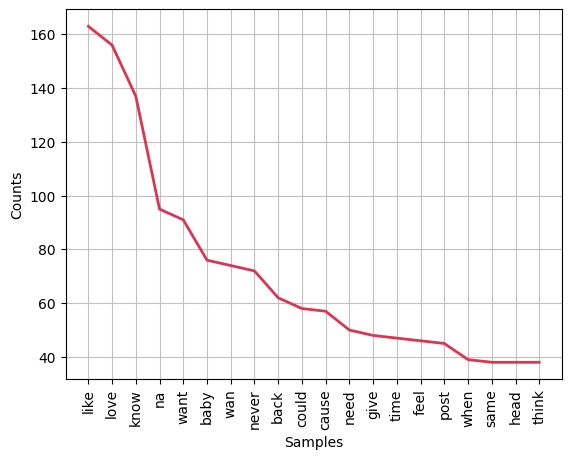

In [9]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Resultado do Gráfico</strong><br>
    Top 20 palavras mais frequentes na discografia da cantora.
</div>

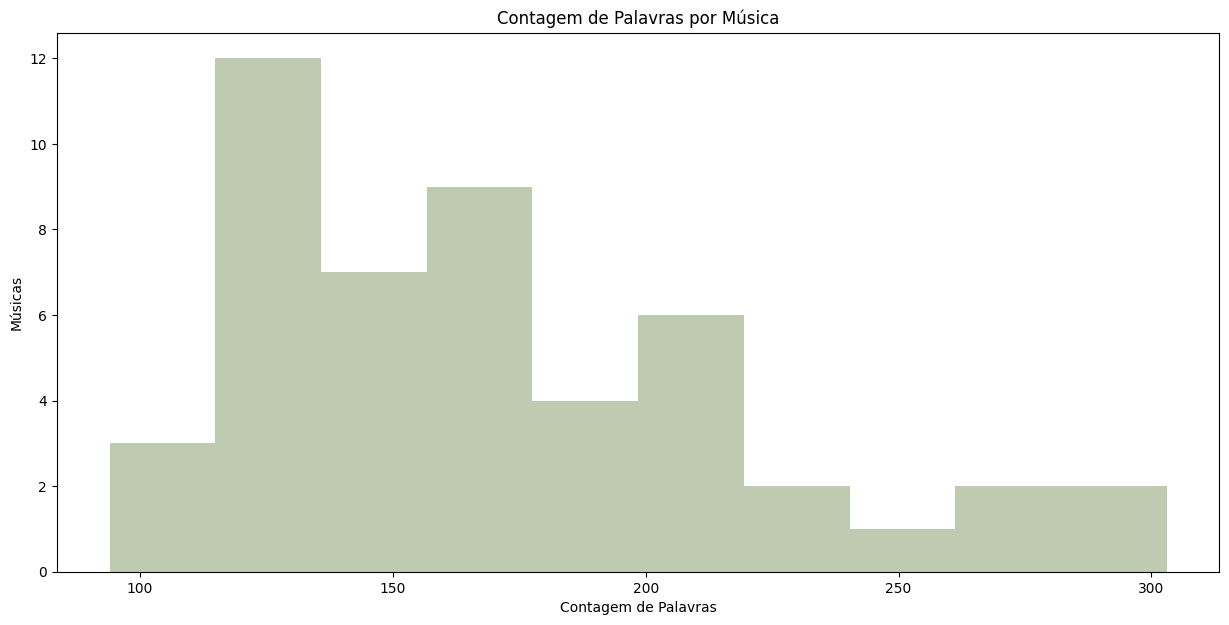

In [10]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    O resultado é um histograma que representa a distribuição da contagem de palavras das músicas. Cada barra no histograma mostra quantas músicas caem dentro de cada intervalo de contagem de palavras. Isso permite visualizar rapidamente como as músicas se distribuem em relação à sua contagem de palavras, identificando padrões, como se a maioria das músicas tende a ser mais curtas ou mais longas.
</div>

### Análise de Sentimento da Discografia

A análise de sentimentos é uma técnica da área de Processamento de Linguagem Natural (PLN) que tem como objetivo identificar e classificar emoções expressas em textos, como opiniões, comentários, avaliações e postagens em redes sociais. Um dos principais aspectos dessa análise é a **polaridade**, que indica a direção do sentimento expresso: **positivo**, **negativo** ou **neutro**.

**Polaridade Positiva** refere-se a textos que expressam sentimentos favoráveis, elogios ou apreciações. Exemplos incluem palavras como "ótimo", "maravilhoso", "excelente" e "gostei". Comentários positivos geralmente indicam satisfação com um produto, serviço ou experiência.

**Polaridade Negativa**, por sua vez, é associada a emoções negativas, críticas ou insatisfações. Termos como "horrível", "péssimo", "não gostei" e "decepcionante" são indicadores comuns. Esse tipo de polaridade ajuda a identificar pontos de melhoria a partir de feedbacks negativos dos usuários.

Já a **Polaridade Neutra** está presente em textos que não expressam uma opinião clara ou não possuem carga emocional significativa. Comentários como "o produto chegou ontem", "estava chovendo" ou "fiz a compra hoje" são exemplos de frases informativas, sem julgamento emocional.

Em aplicações práticas, a identificação correta da polaridade é essencial para empresas e pesquisadores compreenderem melhor o comportamento e a percepção dos usuários. Isso pode influenciar estratégias de marketing, aprimoramento de produtos e até mesmo monitoramento de reputação online.

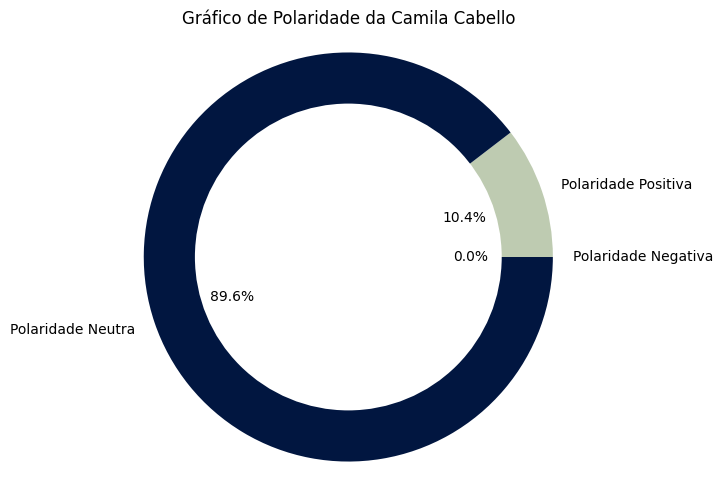

In [11]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade da Camila Cabello')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta 10.4% de polaridade positiva.
</div>

### Nuvem de Palavras
A **nuvem de palavras** (ou *word cloud*, em inglês) é uma técnica visual utilizada para representar a frequência ou relevância de palavras em um determinado conjunto de dados textuais. Nesse tipo de visualização, quanto mais uma palavra aparece em um texto ou conjunto de textos, maior será o seu destaque na nuvem — normalmente por meio de um tamanho de fonte mais elevado.

Essa ferramenta é muito usada em análises exploratórias de dados textuais, especialmente em áreas como análise de sentimentos, mineração de texto, marketing digital, pesquisa acadêmica, entre outras. Ela permite uma compreensão rápida dos termos mais recorrentes em conteúdos como comentários de usuários, postagens em redes sociais, discursos políticos, letras de músicas ou avaliações de produtos.

A construção de uma nuvem de palavras geralmente envolve etapas de pré-processamento do texto, como:
- **Remoção de stopwords** (palavras comuns como “de”, “o”, “e”, que não agregam valor semântico relevante);
- **Lematização ou stemming** (redução de palavras à sua forma base);
- **Tratamento de pontuação e acentuação**.

Embora seja uma técnica simples, a nuvem de palavras oferece uma forma intuitiva e visual de identificar temas recorrentes, tendências e padrões de linguagem.

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count'], dtype='object')


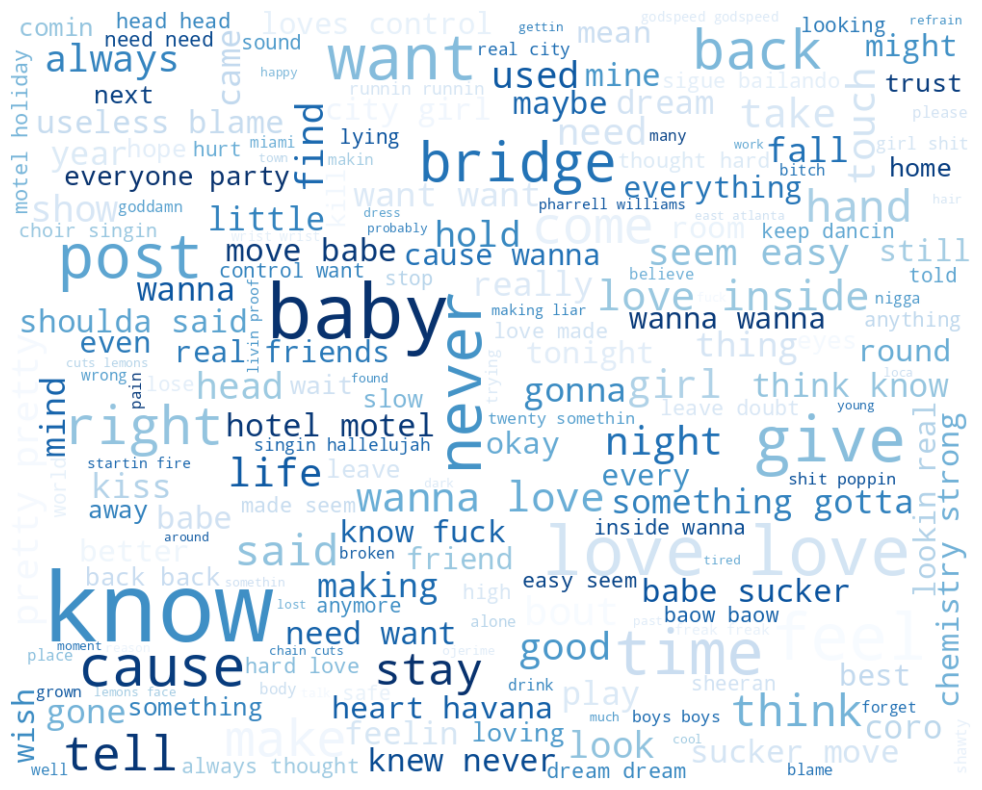

In [12]:
# Exibir os nomes das colunas do DataFrame
print(df.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df['lyrics'] = df['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

## Análise NRC para Inferência de Emoções
O arquivo NRC (National Research Council) é um recurso amplamente utilizado na análise de sentimentos, especialmente no contexto de processamento de linguagem natural (PLN) e mineração de texto. O NRC desenvolveu um léxico de sentimentos que categoriza palavras em diferentes emoções, permitindo que pesquisadores e desenvolvedores analisem letras de músicas, resenhas e outros textos em relação a sentimentos específicos.

### Estrutura do Arquivo NRC
O léxico do NRC é estruturado em várias colunas, onde as palavras são associadas a diferentes emoções e sentimentos, incluindo: Alegria, Tristeza, Medo,
Raiva, Surpresa, Desprezo, Confiança e Antipatia. Cada palavra no léxico é marcada como presente ou ausente em relação a essas emoções, permitindo que os usuários quantifiquem e analisem a presença de sentimentos em um texto.

### Aplicações na Análise de Músicas
Identificação de Emoções: Ao aplicar o léxico NRC às letras de músicas, é possível identificar quais emoções são mais proeminentes em uma canção. Por exemplo, uma letra pode ser classificada como predominantemente alegre, triste ou reflexiva.

**Comparação Entre Músicas:** O NRC permite a comparação de diferentes músicas ou álbuns, facilitando a análise de como os sentimentos evoluem ao longo do tempo ou entre diferentes artistas. Essa comparação pode revelar como as temáticas abordadas nas letras mudam conforme a carreira de um artista avança.

**Análise de Tendências:** Ao analisar um conjunto de músicas (por exemplo, todas as músicas lançadas em um determinado ano), os pesquisadores podem identificar tendências emocionais na música popular. Isso pode fornecer insights sobre a cultura e os sentimentos coletivos de uma sociedade em um período específico.

**Desenvolvimento de Recomendação:** O entendimento dos sentimentos nas músicas pode ajudar a criar sistemas de recomendação mais personalizados, sugerindo músicas com base no estado emocional do ouvinte.

O uso do arquivo NRC na análise de letras de músicas é uma ferramenta poderosa para compreender as emoções expressas na música. Com a capacidade de quantificar sentimentos, pesquisadores e desenvolvedores podem explorar a rica tapeçaria emocional das letras e como elas ressoam com os ouvintes. Essa análise não apenas enriquece nossa compreensão da música como arte, mas também nos oferece uma janela para as emoções humanas e a cultura contemporânea.

In [14]:
#Biblioteca para usar o NRC alinhado ao NLTK
from collections import defaultdict

# Carregar o lexicon NRC
nrc = pd.read_csv("NRC.tsv", sep='\t', names=['word', 'sentiment', 'association'])
nrc = nrc[nrc['association'] == 1]

# Definir emoções (exclui 'positive' e 'negative')
emotion_sentiments = {
    'anger', 'anticipation', 'disgust', 'fear',
    'joy', 'sadness', 'surprise', 'trust'
}

# Dicionário: palavra -> lista de emoções
nrc_dict = defaultdict(list)
for _, row in nrc.iterrows():
    if row['sentiment'] in emotion_sentiments:
        nrc_dict[row['word']].append(row['sentiment'])

# Emoções positivas e negativas para score
positive = {'joy', 'trust', 'anticipation', 'surprise'}
negative = {'anger', 'fear', 'disgust', 'sadness'}

# Função de análise
def analyze_text(text):
    tokens = word_tokenize(text.lower())
    sentiments_count = defaultdict(int)

    for token in tokens:
        for sentiment in nrc_dict.get(token, []):
            sentiments_count[sentiment] += 1

    score = sum(sentiments_count[s] for s in positive) - \
            sum(sentiments_count[s] for s in negative)

    dominant_emotion = max(sentiments_count, key=sentiments_count.get) if sentiments_count else 'neutral'
    filter_label = 'intenso' if abs(score) > 2 else 'neutro'

    return pd.Series([score, dominant_emotion, filter_label], index=['score', 'sentiment', 'filter'])

# Aplicar no DataFrame
df[['score', 'sentiment', 'filter']] = df['lyrics'].apply(analyze_text)

# Normalizar a coluna 'score' entre -1 e 1
min_score = df['score'].min()
max_score = df['score'].max()

# Evitar divisão por zero se max == min
if min_score != max_score:
    df['score'] = 2 * ((df['score'] - min_score) / (max_score - min_score)) - 1
else:
    df['score'] = 0  # ou qualquer valor neutro

# Fazendo cópias para análises profundas
df_original = df.copy()
df_original_2 = df_original.copy()
df_original_3 = df_original.copy()
df_original_4 = df_original.copy()
df_original_5 = df_original.copy()

# Exibir resultado
df

title  \
0                           Havana   
1                Never Be The Same   
2                        Shameless   
3                     Real Friends   
4                         My Oh My   
5                     Consequences   
6                             Liar   
7                         I LUV IT   
8                          Bam Bam   
9                     Living Proof   
10          Something’s Gotta Give   
11                            Easy   
12               She Loves Control   
13                 All These Years   
14                       First Man   
15                       This Love   
16                     In the Dark   
17                    Don’t Go Yet   
18               Should’ve Said It   
19                      Cry for Me   
20                    Used to This   
21         Bad Kind of Butterflies   
22                    ​psychofreak   
23                      Inside Out   
24                   Feel It Twice   
25  Never Be the Same (Radio Edit)   
26                      June Gloom   
27                    Dream of You   
28                         Into It   
29                        GODSPEED   
30                        HE KNOWS   
31                        B.O.A.T.   
32                      HOT UPTOWN   
33                     Chanel No.5   
34               Hasta Los Dientes   
35                   La Buena Vida   
36         ​everyone at this party   
37            Dade County Dreaming   
38                Twentysomethings   
39                           Celia   
40                  Boys Don’t Cry   
41                            Lola   
42               can friends kiss?   
43                           Quiet   
44                        No Doubt   
45                     DREAM-GIRLS   
46                      󠁪baby pink   
47             ​​pretty when i cry   

                                               lyrics  \
0   pharrell williams pharrell williams havana hal...   
1   somethin must gone wrong brain chemicals veins...   
2   speak secret longest time hide been running lo...   
3   think stay tonight skip conversations fine str...   
4   they likes good time comes alive midnight ever...   
5   dirty tissues trust issues glasses sink lonely...   
6   care here alone care long kinda like didn happ...   
7   supersonic orbit diabolic bottle rocket carpet...   
8   said hated ocean surfin said love life sold ho...   
9   promise tell something hands slow when touch p...   
10  loving thought higher your november rain could...   
11  tell complicated might understatement anything...   
12  cold cause before doesn anymore looking back m...   
13  your hair grown little longer your arms look l...   
14  gonna stay tonight mornin course drink drive l...   
15  know make miss when feelin sentimental goin se...   
16  blank stares faithless vampires places shadows...   
17  replayed moment months alone head waitin come ...   
18  want funny cause give back then comin back aro...   
19  well look happy walking street babe babe forge...   
20  never liked francisco never thought nothin spe...   
21  come next look breaking after gonna understand...   
22  willow feelin like psychofreak freak freak fee...   
23  mhmm wanna love inside wanna love inside baby ...   
24  scared look eyes might soul know love lonelies...   
25  something must gone wrong brain chemicals vein...   
26  june gloom tule might well meet montauk cold b...   
27  dancer right answer singer time unless over th...   
28  psychic sick sick medicine gravity hold hands ...   
29  wanna party anymore think jokes sound funny an...   
30  ojerime chemistry strong ojerime think knows c...   
31  hotel motel holiday hotel motel lying replayin...   
32  drake love surely right know time refrain drak...   
33  chanel never survive crime crime watch whine k...   
34  letra hasta dientes verso gustas como tienes i...   
35  woke happy accident forgot gone again words ty...   
36  didn wanna friend gonna here make whole thing ...   


<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Normalização de Dados</strong><br>
    Para evitar validação cruzada de dados e separação de base de teste e aplicação, foi utilizado uma função de normalização de dados.
</div>

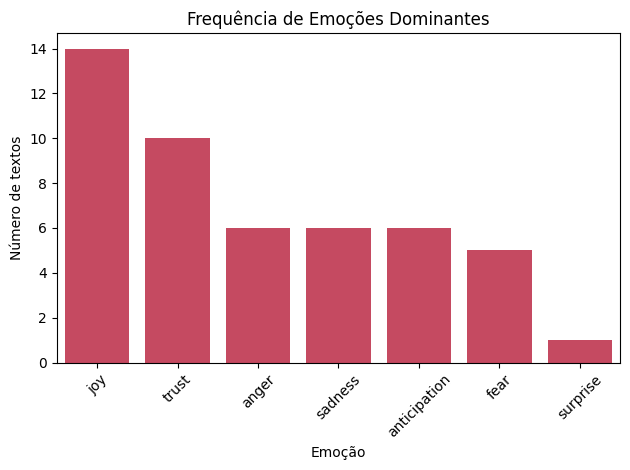

In [15]:
 # Cria um gráfico de barras com contagem
sns.countplot(
    x='sentiment',
    data=df,
    order=df['sentiment'].value_counts().index,  # Ordena as barras pela frequência de cada emoção
    color='#D93654'
)

# Construção do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()                             # Ajusta o layout para evitar que os textos fiquem cortados
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    A discografia possui alto teor de alegria.
</div>

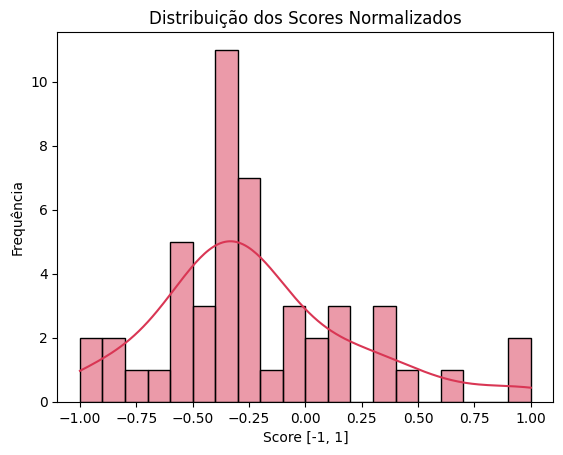

In [16]:
sns.histplot(df['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    Os scores estão bem concentrados em ambas as polaridades.
</div>

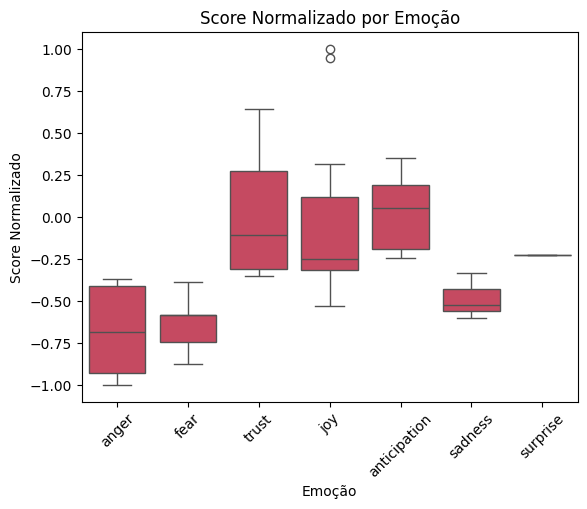

In [17]:
sns.boxplot(x='sentiment', y='score', data=df, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

Esse gráfico boxplot compara os scores normalizados de sentimento para cada emoção.

- O **centro da caixa** é a **mediana** (valor do meio).
- As **caixas** mostram o intervalo interquartílico (de 25% a 75% dos dados).
- Os **"bigodes"** (linhas fora das caixas) mostram a dispersão.
- Os **pontos fora do padrão** são **outliers**.



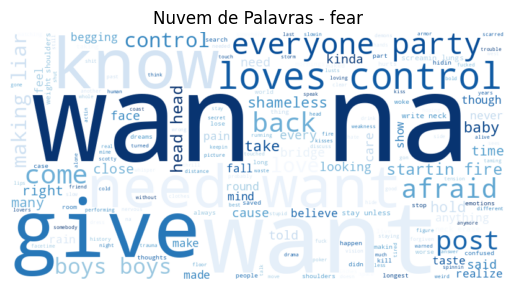

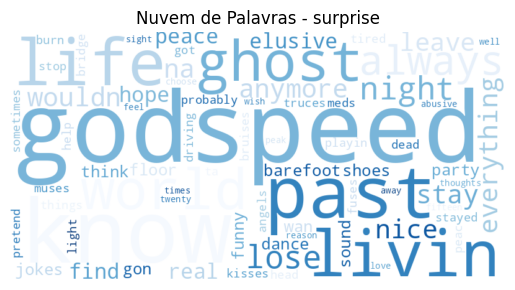

Nenhuma palavra encontrada para a emoção: disgust


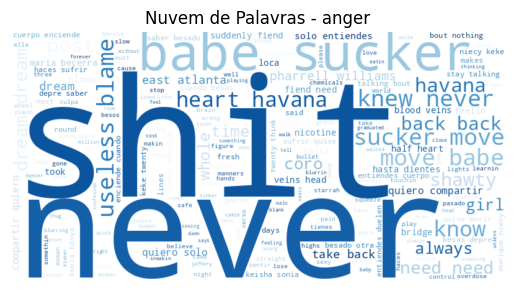

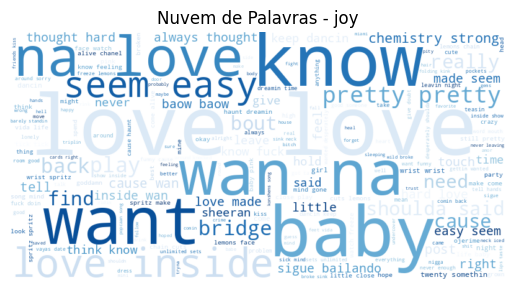

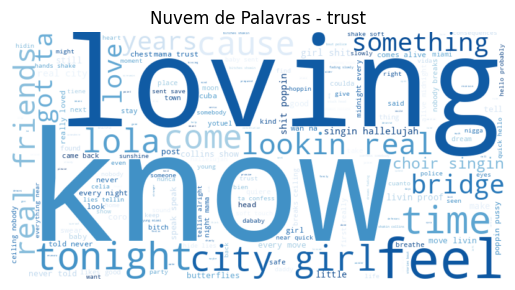

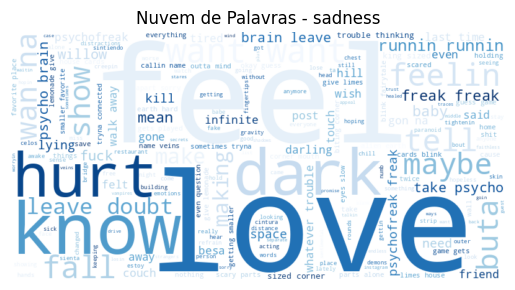

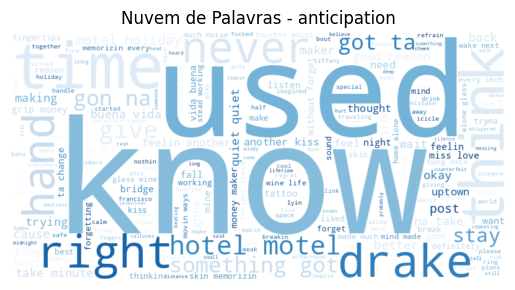

In [18]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []
    for text in df[df['sentiment'] == emotion]['lyrics']:
        words.extend(word_tokenize(text.lower()))

    # Verificar se há palavras antes de gerar a nuvem
    if not words:
        print(f"Nenhuma palavra encontrada para a emoção: {emotion}")
        continue

    # Gerar a nuvem de palavras com fundo branco e tons de azul
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',  # Fundo branco
        colormap='Blues'  # Paleta de tons de azul
    ).generate(' '.join(words))

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras - {emotion}')
    plt.show()

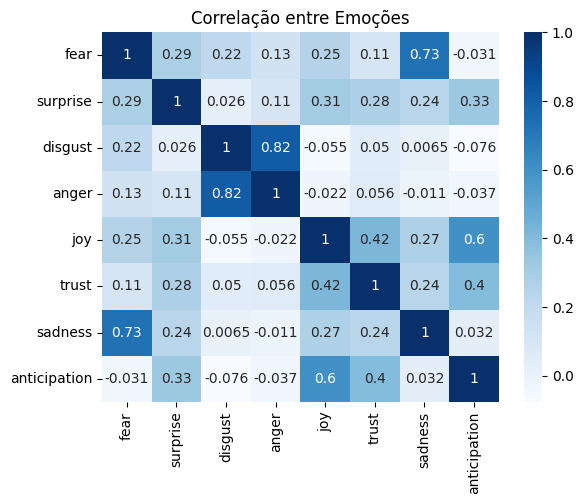

In [19]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

## Análise do álbum Camila

Camila é o álbum de estreia da cantora e compositora cubana-mexicana. Foi lançado em 12 de janeiro de 2018, pelas editoras discográficas *Epic Records* e *Syco Music*. Cabello começou a desenvolver material para o projeto ainda em janeiro de 2017, após a sua saída do grupo feminino Fifth Harmony, em dezembro de 2016.

O álbum foi inicialmente intitulando The Hurting. The Healing. The Loving., com a canção *"Crying in the Club" * sendo originalmente planejada como primeiro *single* solo do projeto, mais tarde foi renomeado *Camila* com *Havana* servindo como *single* oficial devido ao sucesso crescente da música. Assim como nas gravações do Fifth Harmony, Cabello continuou mantendo o *pop* com o principal gênero musical em Camila, com elementos de música latina, *reggaeton*, *dancehall*, *rhythm and blues* (R&B) e música *hip hop*. Os Frank Dukes, Skrillex e T-Minus são alguns dos produtores que assinam algumas das canções presentes na obra.

Camila recebeu críticas positivas de críticos de música contemporânea, muitos dos quais elogiaram as baladas e as influências latinas. O álbum estreou no número um na parada da Billboard 200 nos EUA. *Never Be the Same* foi lançado como *single* em 7 de dezembro de 2017, alcançando o top 10 em vários países. *Consequences* deu continuidade a divulgação do projeto sendo liberado como terceiro e último single do álbum em 9 de outubro de 2018, Cabello promoveu o álbum através de *performances* em programas de televisão, em sua turnê *Never Be the Same Tour*, e como artista de abertura da *Reputation Stadium Tour* da cantora Taylor Swift. O álbum Camila recebeu aclamação da indústria, entre um dos principais reconhecimentos foi a indicação a Melhor Álbum Vocal Pop na edição de 2018 do *Grammy Awards*.

Mais informações em: https://pt.wikipedia.org/wiki/Camila_(%C3%A1lbum)

In [20]:
# Filtrando o DataFrame para excluir músicas do seu álbum
df_c1 = df[df['Album'].isin(['Camila [Target Exclusive]'])]

# Exibindo o DataFrame filtrado
df_c1

title  \
0                           Havana   
1                Never Be The Same   
3                     Real Friends   
5                     Consequences   
10          Something’s Gotta Give   
12               She Loves Control   
13                 All These Years   
16                     In the Dark   
23                      Inside Out   
25  Never Be the Same (Radio Edit)   
28                         Into It   

                                               lyrics  \
0   pharrell williams pharrell williams havana hal...   
1   somethin must gone wrong brain chemicals veins...   
3   think stay tonight skip conversations fine str...   
5   dirty tissues trust issues glasses sink lonely...   
10  loving thought higher your november rain could...   
12  cold cause before doesn anymore looking back m...   
13  your hair grown little longer your arms look l...   
16  blank stares faithless vampires places shadows...   
23  mhmm wanna love inside wanna love inside baby ...   
25  something must gone wrong brain chemicals vein...   
28  psychic sick sick medicine gravity hold hands ...   

                        Album  release_year  Word Count     score  \
0   Camila [Target Exclusive]        2017.0         210 -0.369369   
1   Camila [Target Exclusive]        2017.0         169 -1.000000   
3   Camila [Target Exclusive]        2017.0         155 -0.099099   
5   Camila [Target Exclusive]        2018.0          94  0.477477   
10  Camila [Target Exclusive]        2018.0         134  0.189189   
12  Camila [Target Exclusive]        2018.0         119 -0.387387   
13  Camila [Target Exclusive]        2018.0         129 -0.117117   
16  Camila [Target Exclusive]        2018.0         131 -0.333333   
23  Camila [Target Exclusive]        2018.0         215 -0.531532   
25  Camila [Target Exclusive]        2017.0         165 -0.945946   
28  Camila [Target Exclusive]        2018.0         123 -0.405405   

       sentiment   filter  
0          anger   neutro  
1          anger  intenso  
3          trust  intenso  
5          trust  intenso  
10  anticipation  intenso  
12          fear   neutro  
13         trust  intenso  
16       sadness   neutro  
23           joy  intenso  
25         anger  intenso  
28       sadness  intenso

In [21]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_c1['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 1518 palavras no dataset de letra.
Existem 408 palavras únicas no dataset de letras.


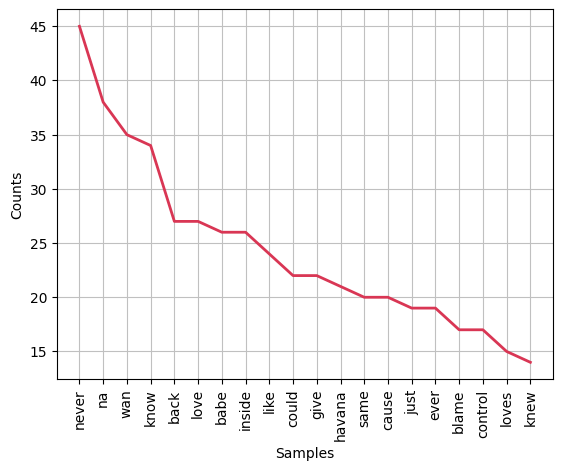

In [22]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

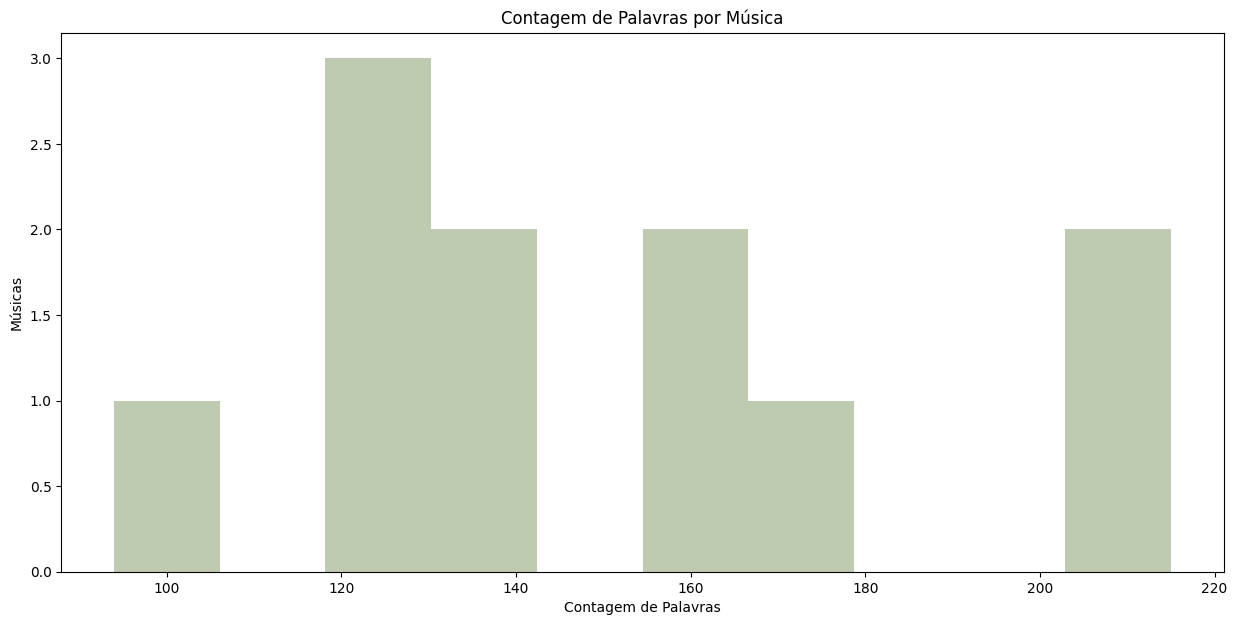

In [23]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_reflection
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_c1['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

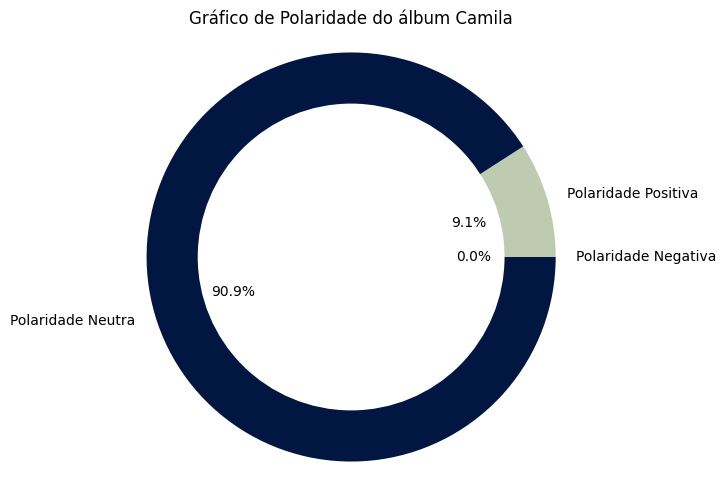

In [24]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_c1['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_c1['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum Camila')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta 9.1% de polaridade positiva.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-25-a5a0a0f571b7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c1['lyrics'] = df_c1['lyrics'].fillna('')  # Substitui valores nulos por string vazia


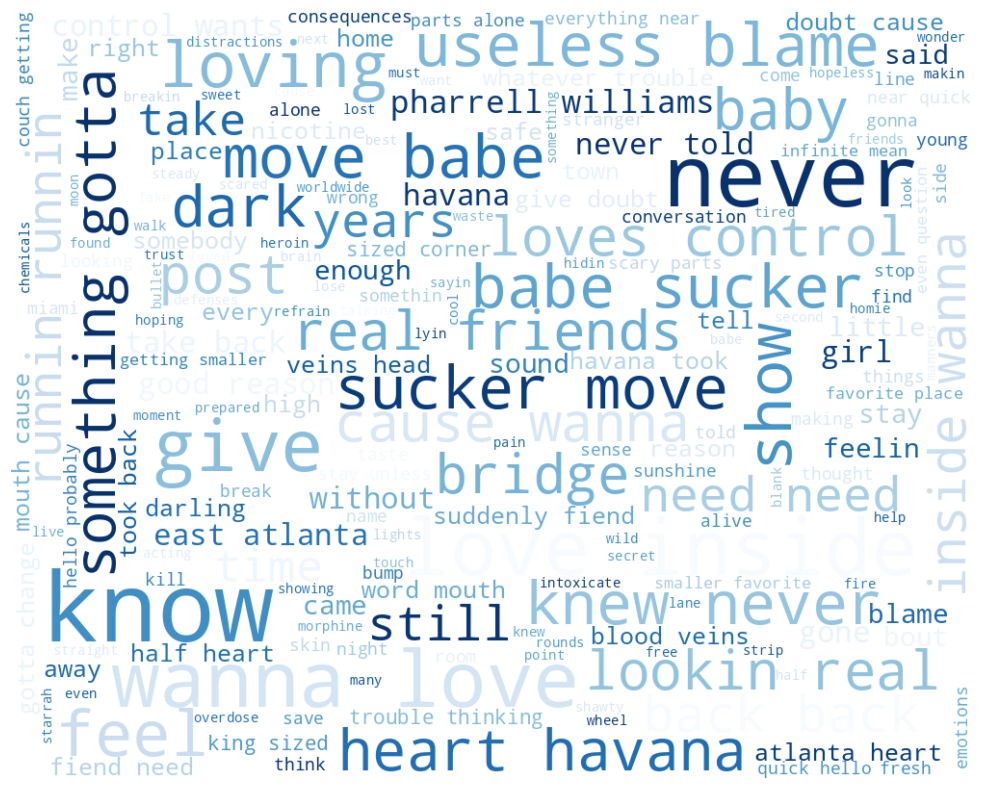

In [25]:
# Exibir os nomes das colunas do DataFrame
print(df_c1.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_c1.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_c1['lyrics'] = df_c1['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_c1['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

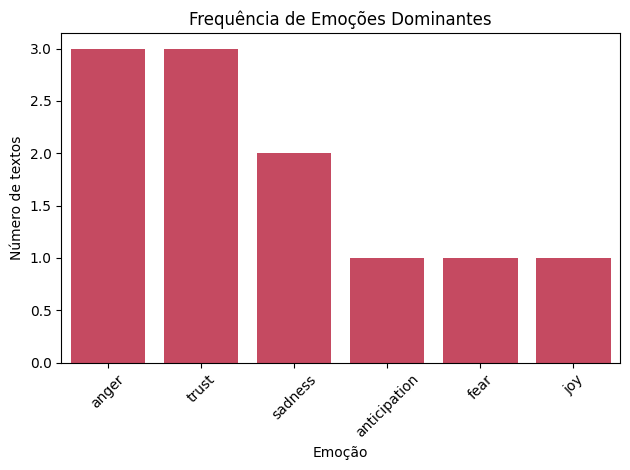

In [26]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_c1,
    order=df_c1['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

# Gerando o gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout() #Ajuste automático
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta predominância de dois sentimentos: *anger* e *trust*.
</div>

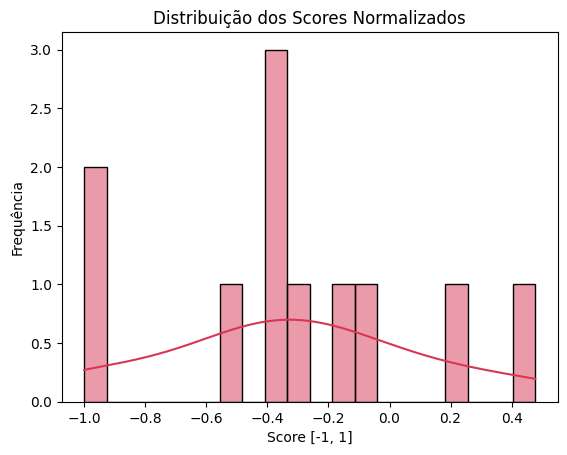

In [27]:
## Construção do Histograma
sns.histplot(df_c1['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

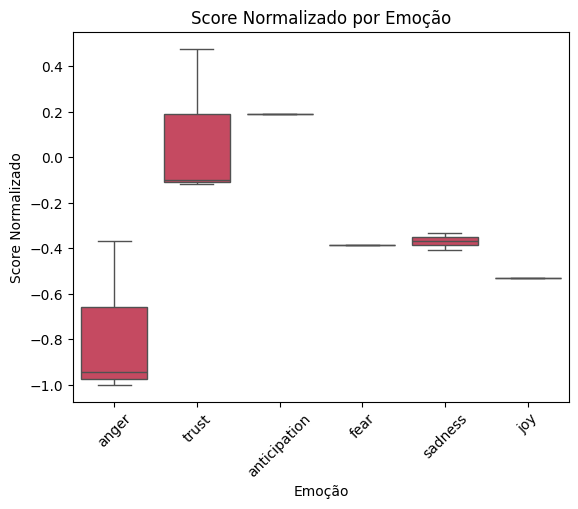

In [28]:
sns.boxplot(x='sentiment', y='score', data=df_c1, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

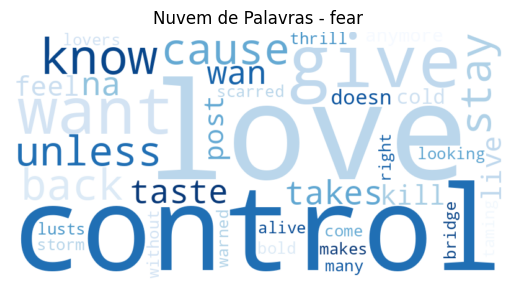

Nenhuma letra encontrada para a emoção 'surprise'.
Nenhuma letra encontrada para a emoção 'disgust'.


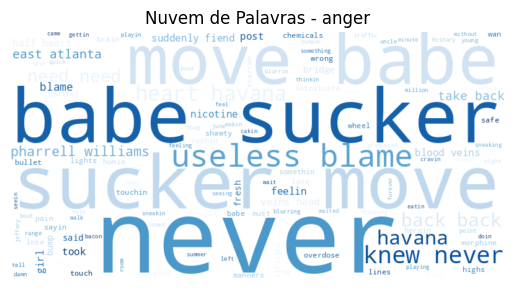

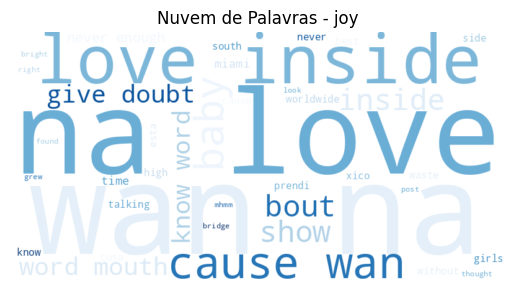

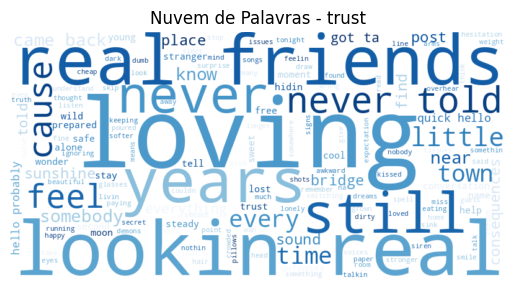

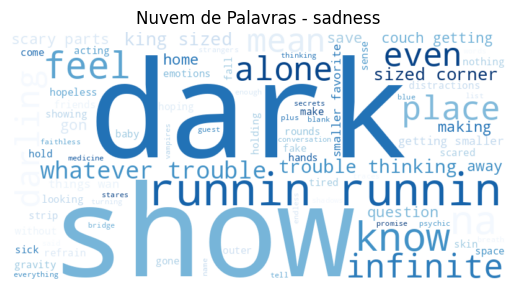

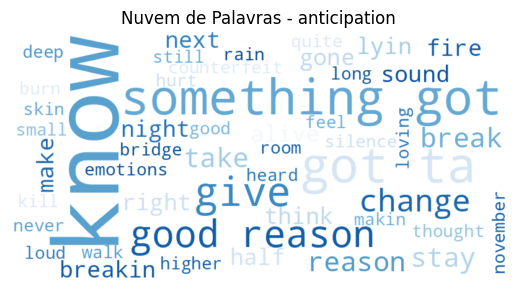

In [30]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_c1[df_c1['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

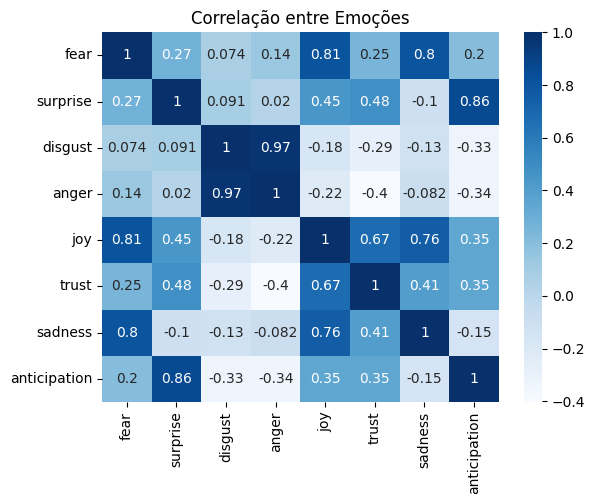

In [31]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_c1['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

### Análise do Álbum Romance

*Romance* é o segundo álbum de estúdio da cantora, lançado em 6 de dezembro de 2019 através da *Epic Records* e *Syco Music*. O disco foi desenvolvido e gravada entre novembro de 2018 a outubro de 2019 e foi produzido por Frank Dukes, Louis Bell, the Monsters and the Strangerz, John Hill, Andrew Watt, Finneas, entre outros. Musicalmente, é um disco *pop* que contém *R&B*, pop latino e influências do *rock*.

*Romance* foi procedido por seis singles: "Liar","Shameless", "Cry for Me", "Easy", "Living Proof", "My Oh My" e "First Man". *Romance* recebeu críticas geralmente positivas dos críticos de música e estreou em primeiro lugar no Canadá, número três nos EUA, e no top 10 em vários outros países. Para promover o álbum, Cabello embarcou na *The Romance Tour*, começando pela Europa e depois pela América do Norte. O álbum recebeu certificado de platina pela Recording Industry Association of America (RIAA).

Mais informações em: https://pt.wikipedia.org/wiki/Romance_(%C3%A1lbum_de_Camila_Cabello)



In [32]:
# Filtrando o DataFrame para excluir músicas do seu álbum
df_r = df[df['Album'].isin(['Romance'])]

# Exibindo o DataFrame filtrado
df_r

title  \
2                 Shameless   
4                  My Oh My   
6                      Liar   
9              Living Proof   
11                     Easy   
14                First Man   
15                This Love   
18        Should’ve Said It   
19               Cry for Me   
20             Used to This   
21  Bad Kind of Butterflies   
24            Feel It Twice   
27             Dream of You   

                                               lyrics    Album  release_year  \
2   speak secret longest time hide been running lo...  Romance        2019.0   
4   they likes good time comes alive midnight ever...  Romance        2019.0   
6   care here alone care long kinda like didn happ...  Romance        2019.0   
9   promise tell something hands slow when touch p...  Romance        2019.0   
11  tell complicated might understatement anything...  Romance        2019.0   
14  gonna stay tonight mornin course drink drive l...  Romance        2019.0   
15  know make miss when feelin sentimental goin se...  Romance        2019.0   
18  want funny cause give back then comin back aro...  Romance        2019.0   
19  well look happy walking street babe babe forge...  Romance        2019.0   
20  never liked francisco never thought nothin spe...  Romance        2019.0   
21  come next look breaking after gonna understand...  Romance        2019.0   
24  scared look eyes might soul know love lonelies...  Romance        2019.0   
27  dancer right answer singer time unless over th...  Romance        2019.0   

    Word Count     score     sentiment   filter  
2          141 -0.873874          fear  intenso  
4          180  0.639640         trust  intenso  
6          117 -0.585586          fear  intenso  
9          174  0.351351         trust  intenso  
11         219  0.153153           joy  intenso  
14         130  0.045045         trust  intenso  
15         160 -0.495495       sadness  intenso  
18         187 -0.315315           joy   neutro  
19         137  0.315315           joy  intenso  
20         191 -0.081081  anticipation  intenso  
21         122 -0.333333         trust   neutro  
24         135 -0.567568       sadness  intenso  
27         129 -0.387387         anger   neutro

In [33]:
# Lista de palavras indesejadas presentes na discografia
indesejadas = ['yeah','na','quavo']

# Remove palavras indesejadas, e salva de volta como um texto longo
df_r['lyrics'] = df_r['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_r['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 1844 palavras no dataset de letra.
Existem 486 palavras únicas no dataset de letras.


<ipython-input-33-9d9ad266931d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['lyrics'] = df_r['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))


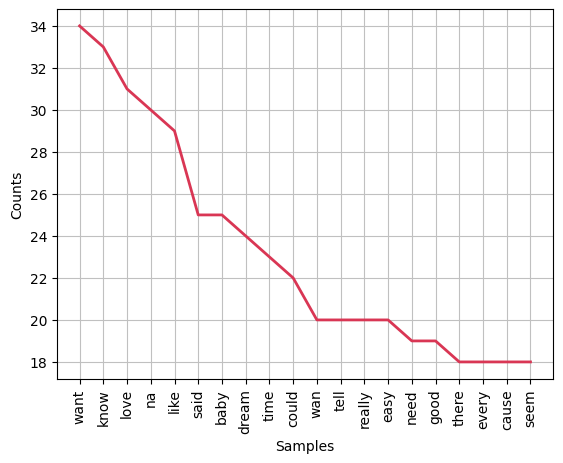

In [34]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

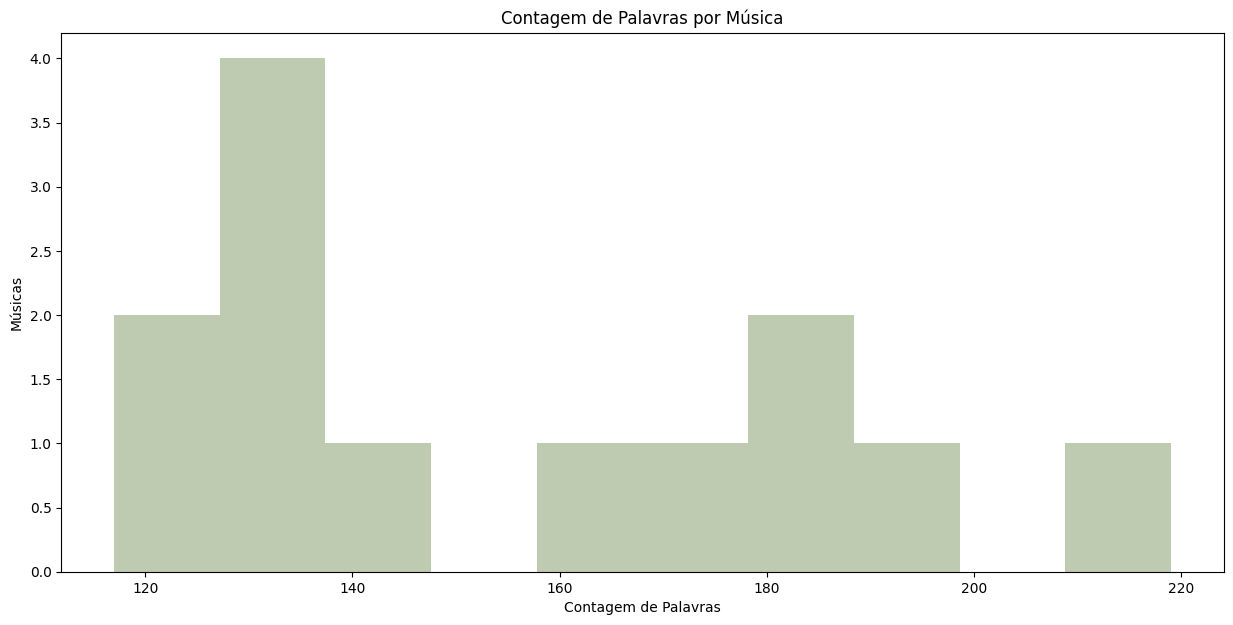

In [35]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_dopamine
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_r['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

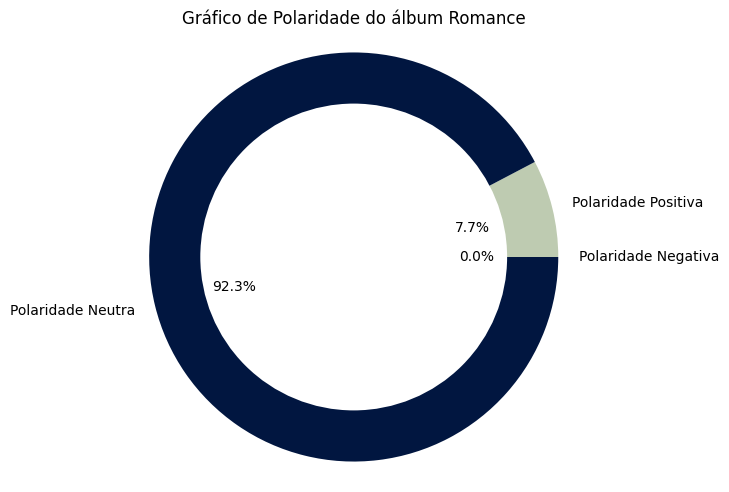

In [36]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_r['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_r['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum Romance')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    O álbum apresenta apenas 7.7% de polaridade positiva, indicando regressão nas composições da artista.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-37-0344e0d342dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['lyrics'] = df_r['lyrics'].fillna('')  # Substitui valores nulos por string vazia


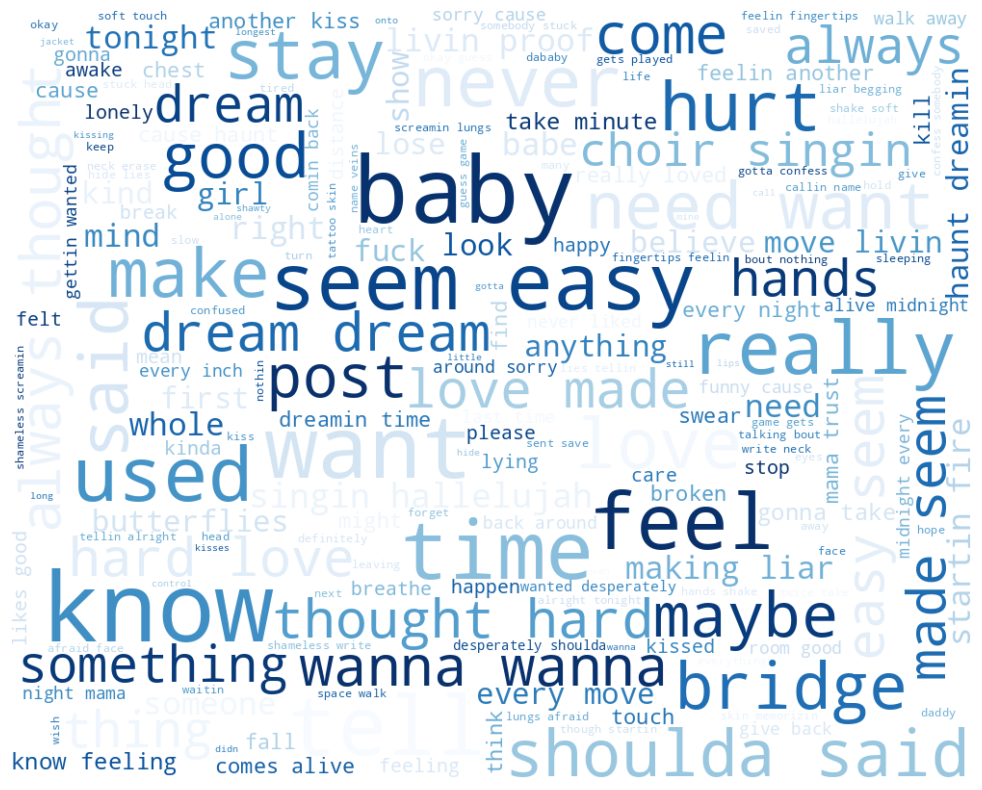

In [37]:
# Exibir os nomes das colunas do DataFrame
print(df_r.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_r.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_r['lyrics'] = df_r['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_r['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

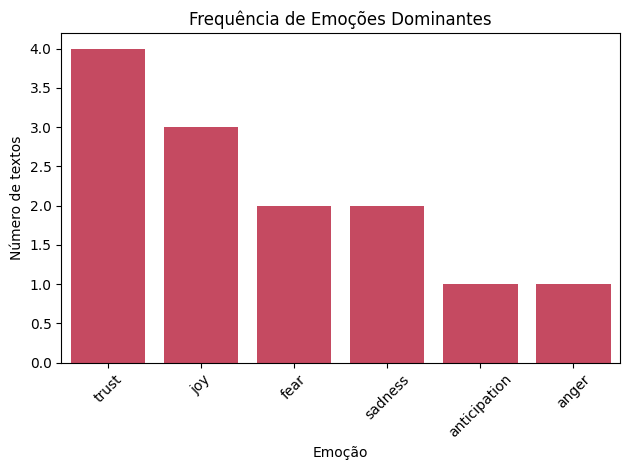

In [38]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_r,
    order=df_r['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

#Exibição do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    Dominância do sentimento de confiança.
</div>


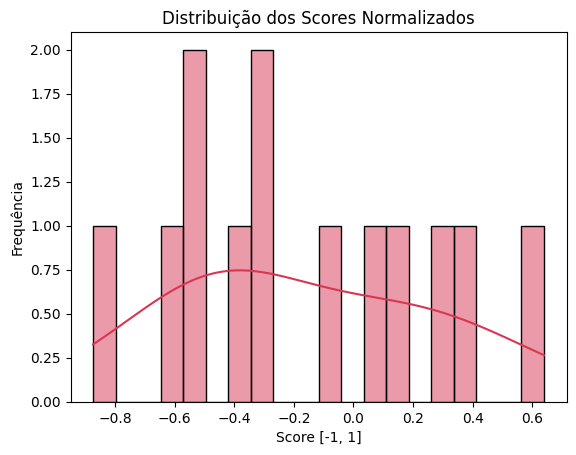

In [39]:
# Gerando o Histograma
sns.histplot(df_r['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

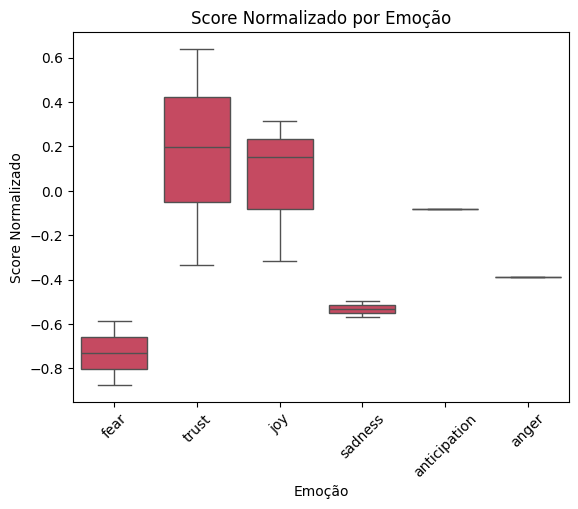

In [40]:
# Gerando o Boxplot
sns.boxplot(x='sentiment', y='score', data=df_r, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

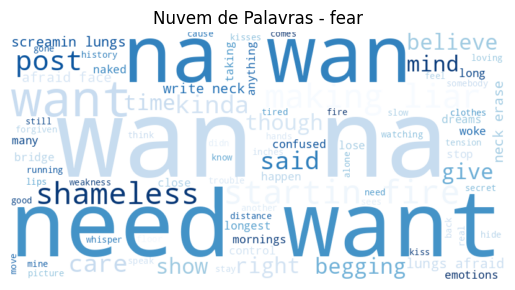

Nenhuma letra encontrada para a emoção 'surprise'.
Nenhuma letra encontrada para a emoção 'disgust'.


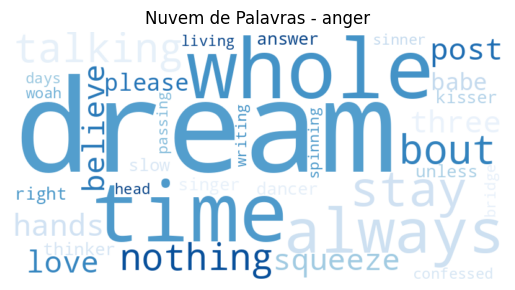

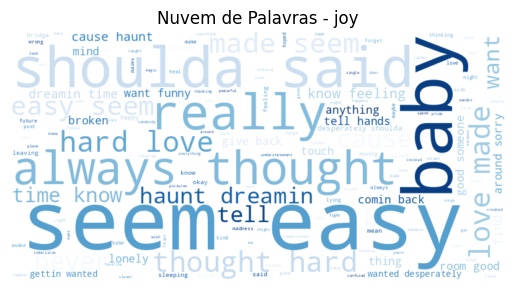

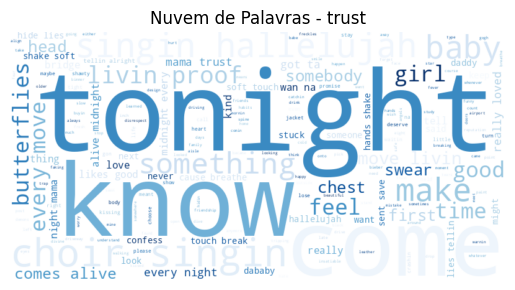

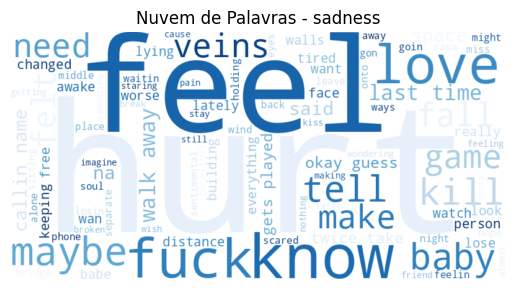

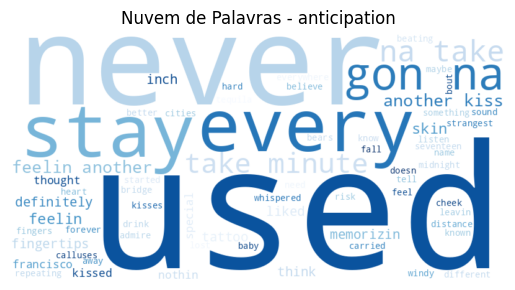

In [41]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_r[df_r['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

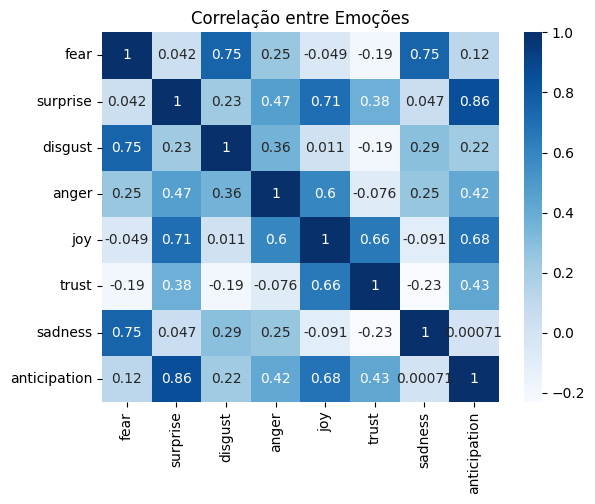

In [42]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_r['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

### Análise do álbum Familia

*Familia* é o terceiro álbum de estúdio da cantora, lançado em 8 de abril de 2022, através da *Epic Records*. Cabello escreveu o álbum durante a pandemia de COVID-19 entre 2020 e 2021 com produtores como Mike Sabath, Ricky Reed, Edgar Barrera e Cheche Alara. O álbum foi inspirado na “manifesta alegria coletiva” que Cabello sentiu com sua família durante a pandemia e trata de se conectar com as raízes latina-americanas da cantora. Familia contém participações de Willow, Ed Sheeran, Maria Becerra e Youtel.

O primeiro single "Don't Go Yet" entrou nas paradas em vários países, alcançando o número 42 na *Billboard Hot 100*. Foi seguido por "Bam Bam", com participação do cantor e compositor britânico Ed Sheeran, que alcançou o número 23 na *Hot 100*, número 8 no *UK Singles Chart*, e número 10 na *Billboard Global 200 *e *Canadian Hot 100*. Para promover o álbum, Cabello realizou um show virtual no *TikTok*, intitulado *Familia: Welcome to the Family* em 7 de abril de 2022.

Mais informações em: https://pt.wikipedia.org/wiki/Familia_(%C3%A1lbum_de_Camila_Cabello)

In [43]:
# Filtrando o DataFrame para excluir músicas dos álbuns Reflection, 7/27 e Fifth Harmony
df_f = df_original_2[df_original_2['Album'].isin(['Familia'])]

# Exibindo o DataFrame filtrado
df_f

title  \
8                   Bam Bam   
17             Don’t Go Yet   
22             ​psychofreak   
34        Hasta Los Dientes   
35            La Buena Vida   
36  ​everyone at this party   
39                    Celia   
40           Boys Don’t Cry   
41                     Lola   
43                    Quiet   
44                 No Doubt   

                                               lyrics    Album  release_year  \
8   said hated ocean surfin said love life sold ho...  Familia        2022.0   
17  replayed moment months alone head waitin come ...  Familia        2021.0   
22  willow feelin like psychofreak freak freak fee...  Familia        2022.0   
34  letra hasta dientes verso gustas como tienes i...  Familia        2022.0   
35  woke happy accident forgot gone again words ty...  Familia        2022.0   
36  didn wanna friend gonna here make whole thing ...  Familia        2022.0   
39  letra celia verso quiere mudar miami tomarse t...  Familia        2022.0   
40  know thoughts want head spinnin round round ro...  Familia        2022.0   
41  yotuel esto yotuel casa lola smartest school s...  Familia        2022.0   
43  comin over started takin breaths cause anxious...  Familia        2022.0   
44  buta buta buta seeing visions ceiling drunken ...  Familia        2022.0   

    Word Count     score     sentiment   filter  
8          240 -0.333333           joy   neutro  
17         133 -0.243243           joy  intenso  
22         266 -0.603604       sadness  intenso  
34         175 -0.495495         anger  intenso  
35         159 -0.243243  anticipation  intenso  
36         101 -0.585586          fear  intenso  
39         102 -0.351351         trust   neutro  
40         182 -0.747748          fear  intenso  
41         214 -0.243243         trust  intenso  
43         141 -0.225225  anticipation  intenso  
44         211 -0.549550       sadness  intenso

In [46]:
# Lista de palavras indesejadas presentes na discografia
indesejadas = ['yeah','na']

# Remove palavras indesejadas, e salva de volta como um texto longo
df_f['lyrics'] = df_f['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_r['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 1844 palavras no dataset de letra.
Existem 486 palavras únicas no dataset de letras.


<ipython-input-46-95cce2c445c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['lyrics'] = df_f['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))


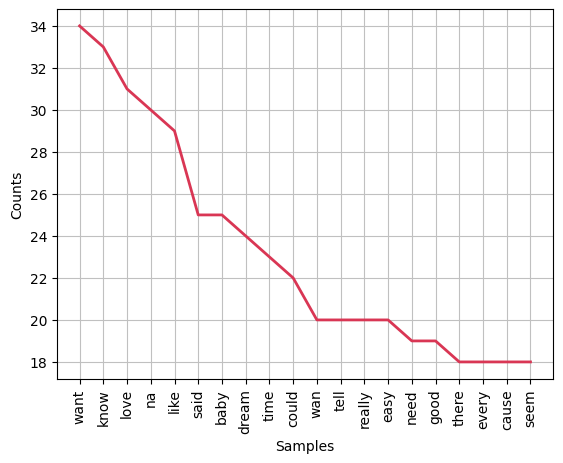

In [47]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

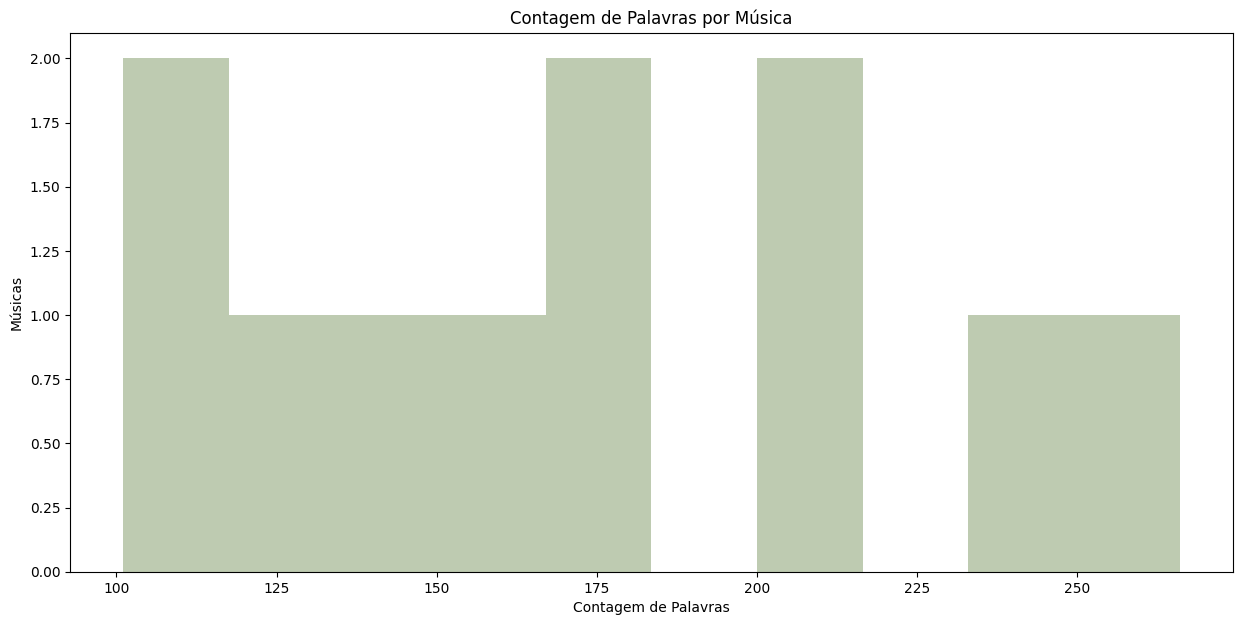

In [48]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_dopamine
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_f['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

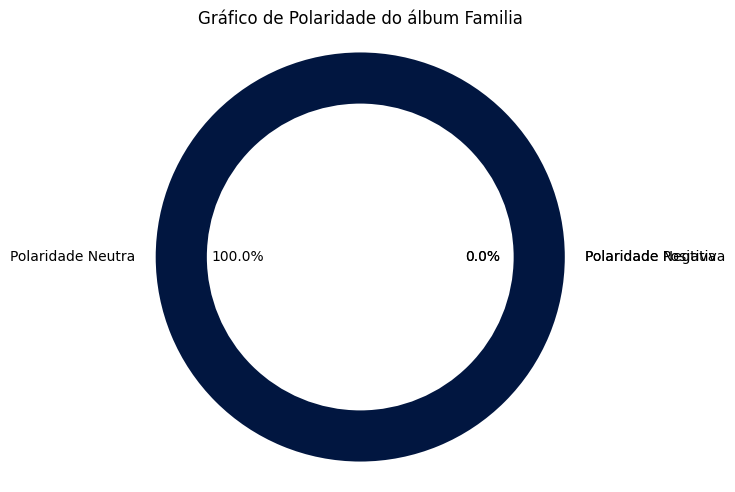

In [45]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_f['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_f['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum Familia')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    O álbum apresenta apenas polaridade neutra.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-62-6c427338c7fb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['lyrics'] = df_f['lyrics'].fillna('')  # Substitui valores nulos por string vazia


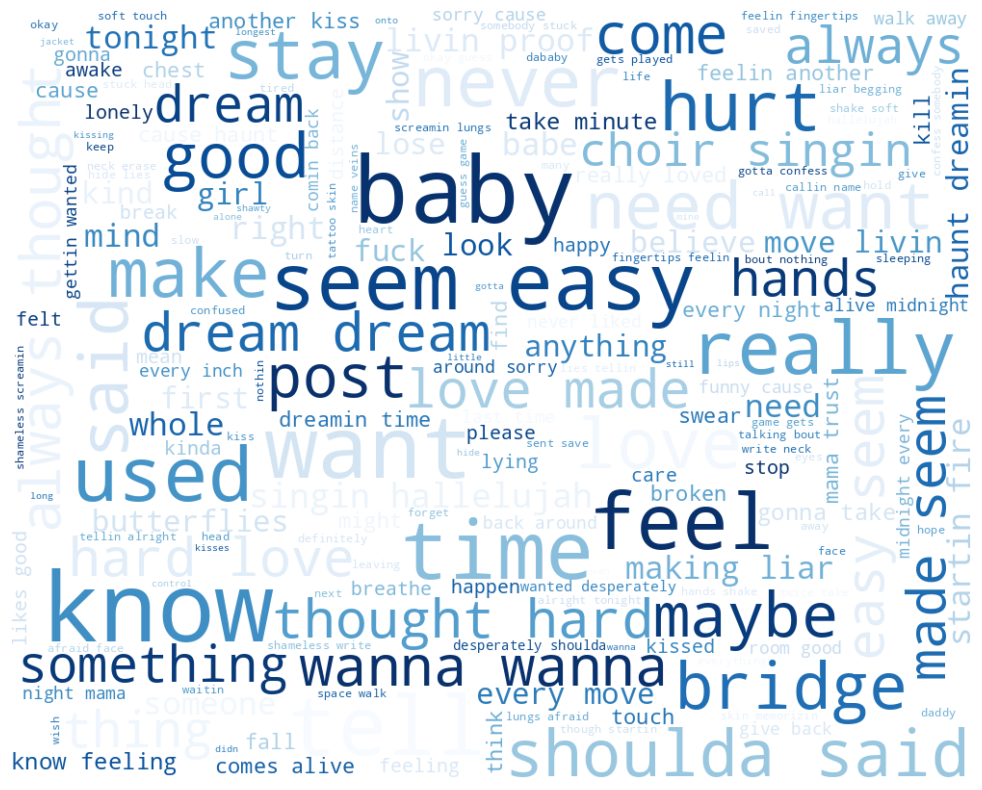

In [62]:
# Exibir os nomes das colunas do DataFrame
print(df_f.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_f.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_f['lyrics'] = df_f['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_r['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

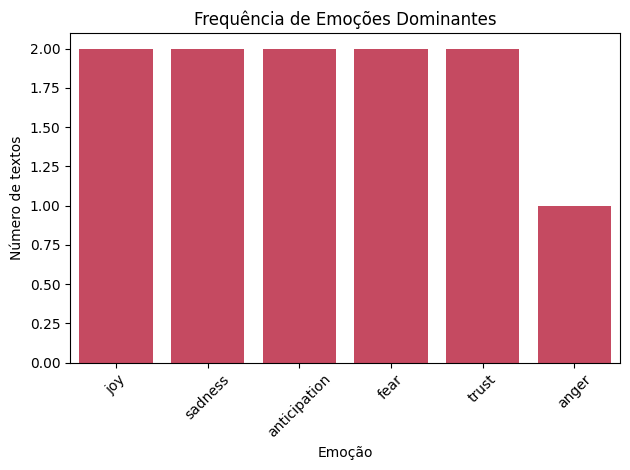

In [50]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_f,
    order=df_f['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

#Exibição do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

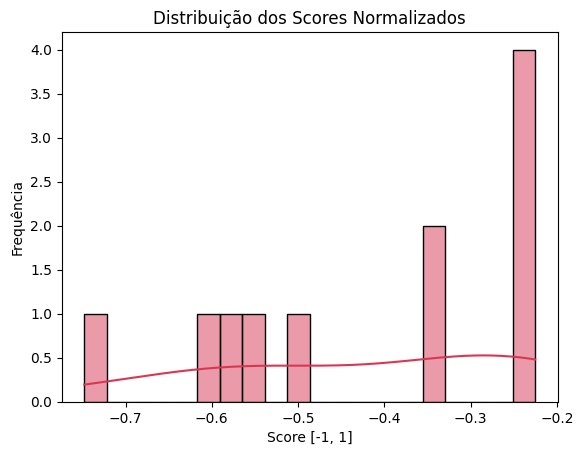

In [51]:
# Gerando o Histograma
sns.histplot(df_f['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

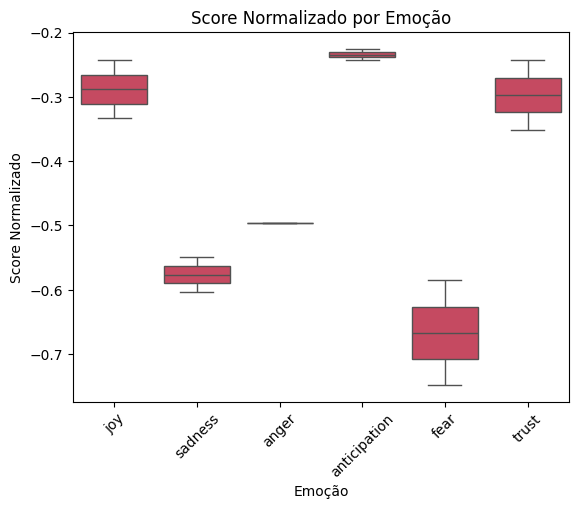

In [52]:
# Gerando o Boxplot
sns.boxplot(x='sentiment', y='score', data=df_f, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

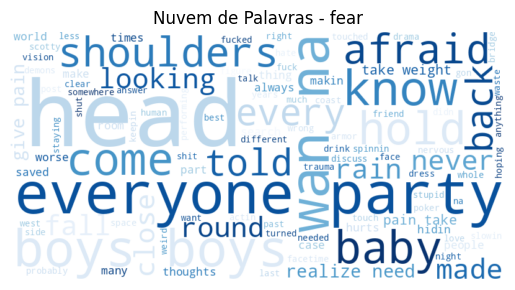

Nenhuma letra encontrada para a emoção 'surprise'.
Nenhuma letra encontrada para a emoção 'disgust'.


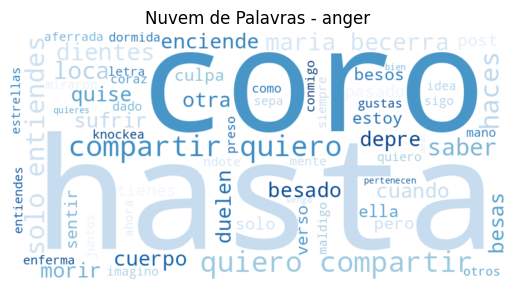

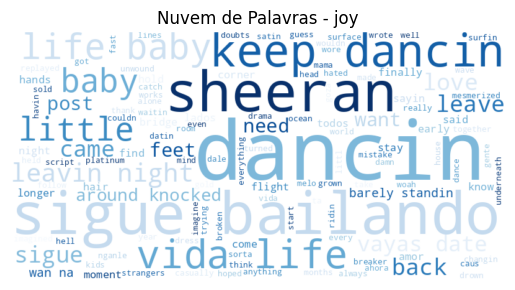

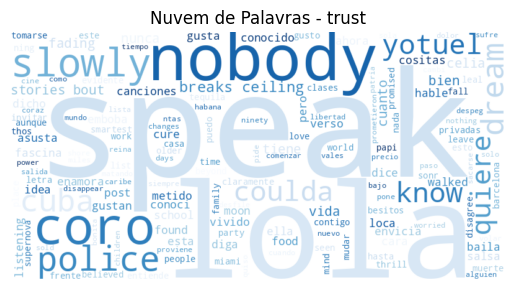

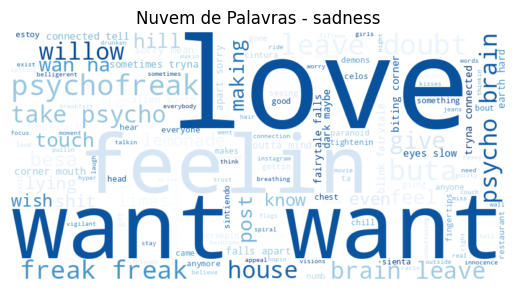

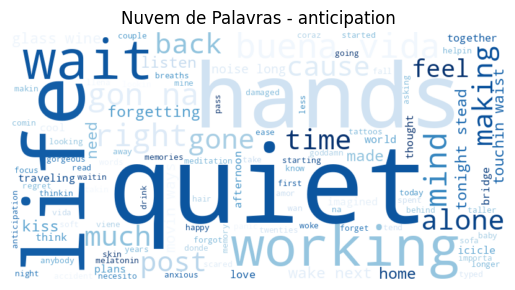

In [53]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_f[df_f['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

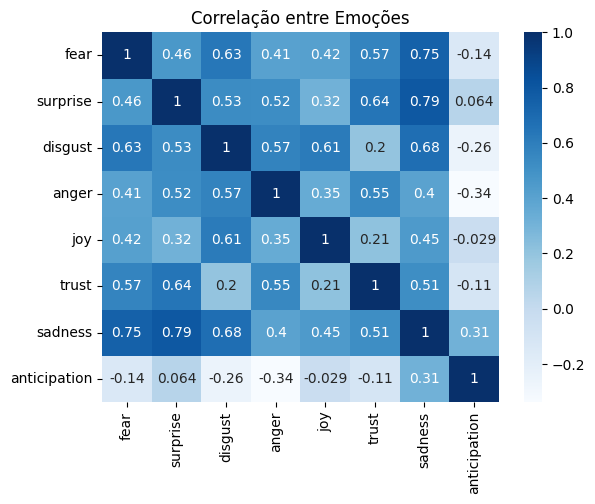

In [54]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_f['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

### Análise do álbum C,XoXo

*C,XOXO* é o quarto álbum de estúdio da cantora, lançado em 28 de junho de 2024 através da *Geffen* e *Interscope Records*. É seu primeiro álbum após sua saída da *Epic Records*.

O álbum foi precedido pelo lançamento dos *singles* "I LUV IT" com Playboi Carti, que alcançou a posição 81 na Billboard Hot 100, e "HE KNOWS" com Lil Nas X, bem como o *single* promocional "Chanel No. 5". Após o lançamento do álbum, "HOT UPTOWN" com Drake foi lançado como o quarto *single* do disco. Cabello lançou o *single* ''GODSPEED'' no dia 6 de setembro junto com a versão deluxe do álbum - C,XOXO (Magic City Edition).

Mais informações em: https://pt.wikipedia.org/wiki/C,XOXO

In [55]:
# Filtrando o DataFrame para excluir músicas dos álbuns Reflection, 7/27 e Fifth Harmony
df_xo = df_original_3[df_original_3['Album'].isin(['C,XOXO (Magic City Edition)'])]

# Exibindo o DataFrame filtrado
df_xo

title                                             lyrics  \
7               I LUV IT  supersonic orbit diabolic bottle rocket carpet...   
26            June Gloom  june gloom tule might well meet montauk cold b...   
29              GODSPEED  wanna party anymore think jokes sound funny an...   
30              HE KNOWS  ojerime chemistry strong ojerime think knows c...   
31              B.O.A.T.  hotel motel holiday hotel motel lying replayin...   
32            HOT UPTOWN  drake love surely right know time refrain drak...   
33           Chanel No.5  chanel never survive crime crime watch whine k...   
37  Dade County Dreaming  refrain real city girl shit poppin pussy real ...   
38      Twentysomethings  know confused need truth last time review hate...   
42     can friends kiss?  call number slow whine make wonder fantasies h...   
45           DREAM-GIRLS  used kick park grown rockin stilettos jumpin m...   
46            󠁪baby pink  think fine looks like sleep wreck kingsized st...   
47   ​​pretty when i cry  best dress sorry baby least like leave still p...   

                          Album  release_year  Word Count     score  \
7   C,XOXO (Magic City Edition)        2024.0         248  0.945946   
26  C,XOXO (Magic City Edition)        2024.0         151 -0.081081   
29  C,XOXO (Magic City Edition)        2024.0         138 -0.225225   
30  C,XOXO (Magic City Edition)        2024.0         270 -0.297297   
31  C,XOXO (Magic City Edition)        2024.0         143  0.189189   
32  C,XOXO (Magic City Edition)        2024.0         221  0.351351   
33  C,XOXO (Magic City Edition)        2024.0         219  0.009009   
37  C,XOXO (Magic City Edition)        2024.0         283 -0.333333   
38  C,XOXO (Magic City Edition)        2024.0         175 -0.333333   
42  C,XOXO (Magic City Edition)        2024.0         171 -0.261261   
45  C,XOXO (Magic City Edition)        2024.0         169 -0.873874   
46  C,XOXO (Magic City Edition)        2024.0         303 -0.315315   
47  C,XOXO (Magic City Edition)        2024.0         131  1.000000   

       sentiment   filter  
7            joy  intenso  
26           joy  intenso  
29      surprise  intenso  
30           joy  intenso  
31  anticipation  intenso  
32  anticipation  intenso  
33           joy  intenso  
37         trust   neutro  
38           joy   neutro  
42           joy  intenso  
45         anger  intenso  
46           joy   neutro  
47           joy  intenso

In [56]:
# Lista de palavras indesejadas presentes na discografia
indesejadas = ['yeah','na']

# Remove palavras indesejadas, e salva de volta como um texto longo
df_xo['lyrics'] = df_xo['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_r['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 1844 palavras no dataset de letra.
Existem 486 palavras únicas no dataset de letras.


<ipython-input-56-bafbdc73a5cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xo['lyrics'] = df_xo['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))


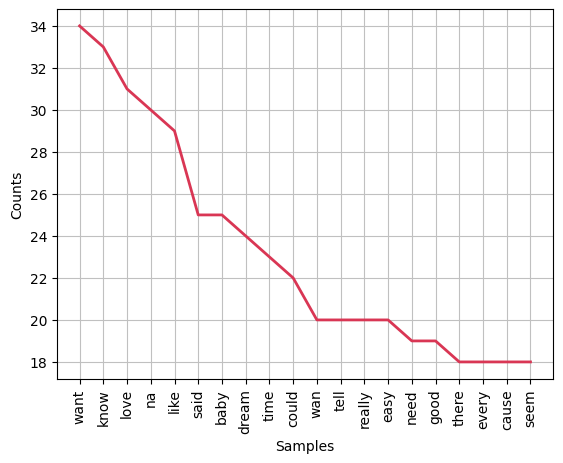

In [57]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

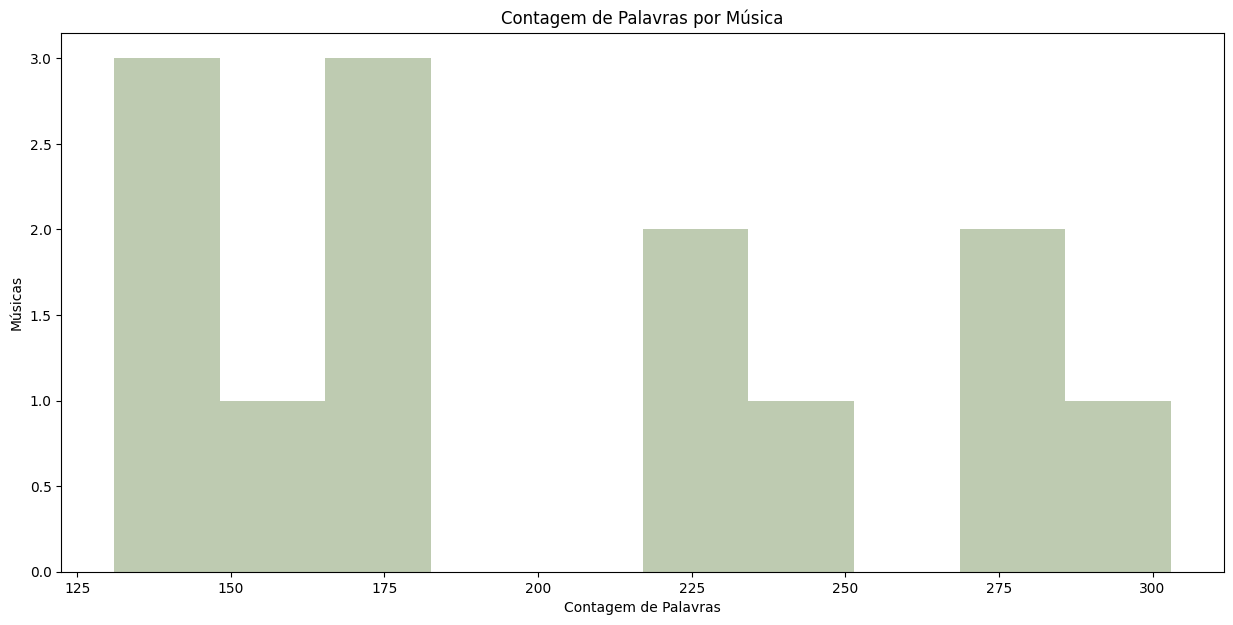

In [58]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_dopamine
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_xo['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

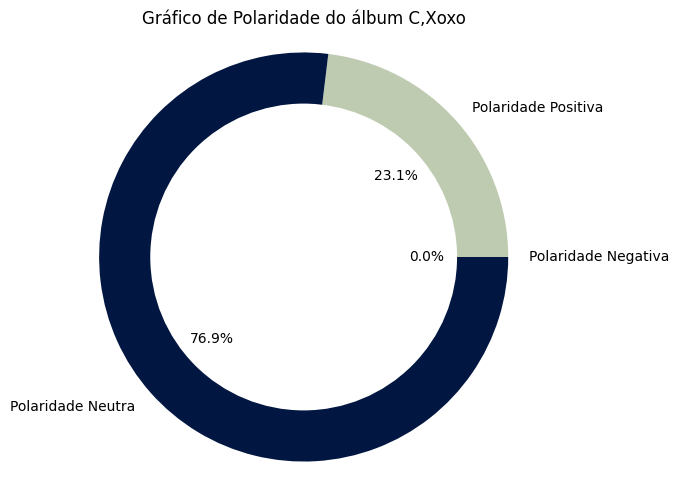

In [59]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_xo['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_xo['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum C,Xoxo')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    O álbum apresenta 23.1% de polaridade positiva, consolidando emoções positivas a discografia da cantora.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-60-ff2e7252b91a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['lyrics'] = df_xo['lyrics'].fillna('')  # Substitui valores nulos por string vazia


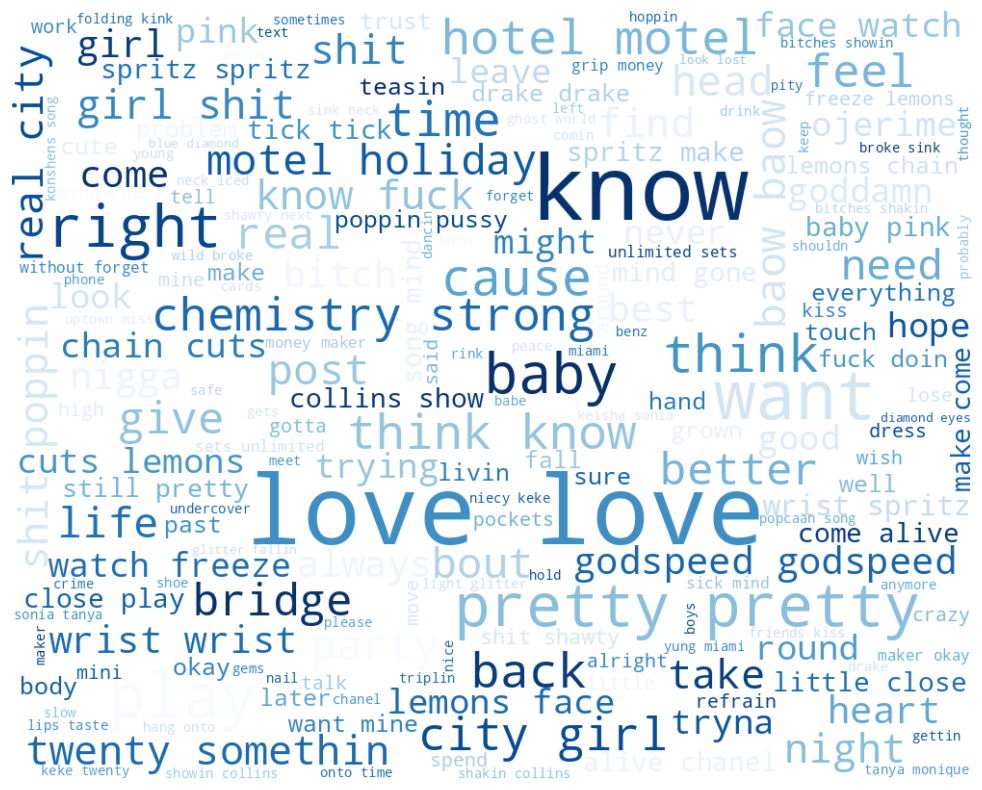

In [60]:
# Exibir os nomes das colunas do DataFrame
print(df_xo.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_xo.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_f['lyrics'] = df_xo['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_xo['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

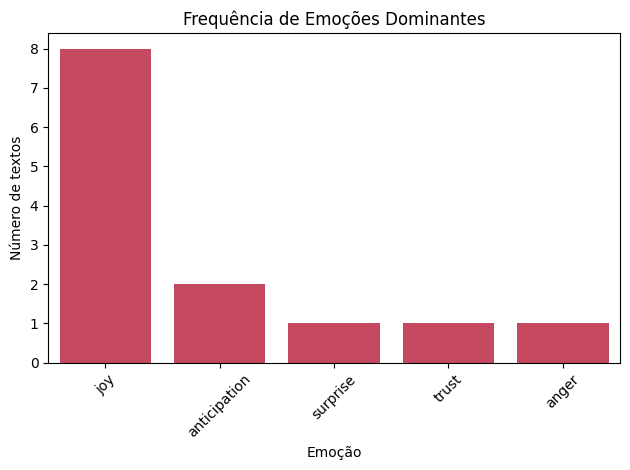

In [63]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_xo,
    order=df_xo['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

#Exibição do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    Com base nos resultados anteriores, alegria é o sentimento mais predominante do álbum.
</div>

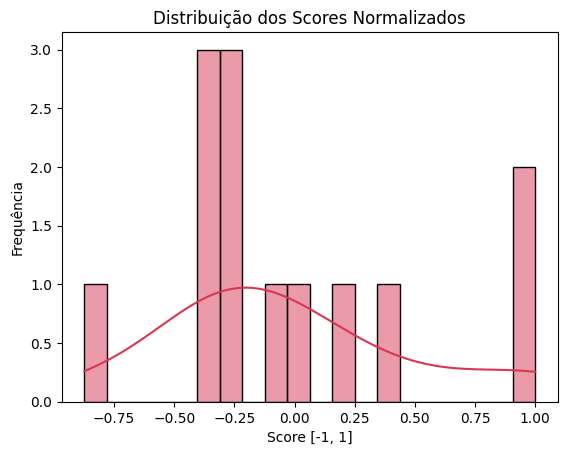

In [64]:
# Gerando o Histograma
sns.histplot(df_xo['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

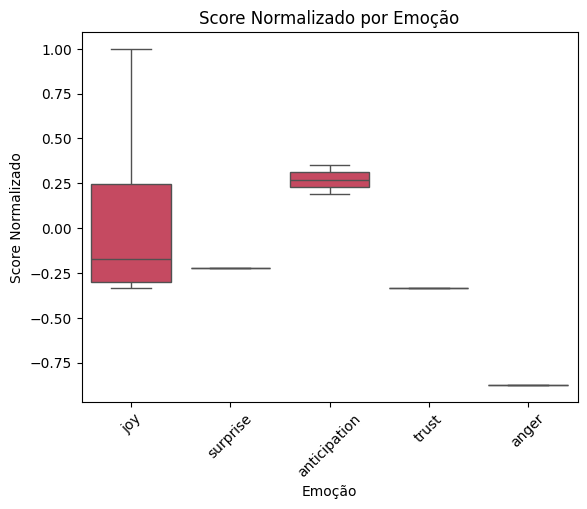

In [65]:
# Gerando o Boxplot
sns.boxplot(x='sentiment', y='score', data=df_xo, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

Nenhuma letra encontrada para a emoção 'fear'.


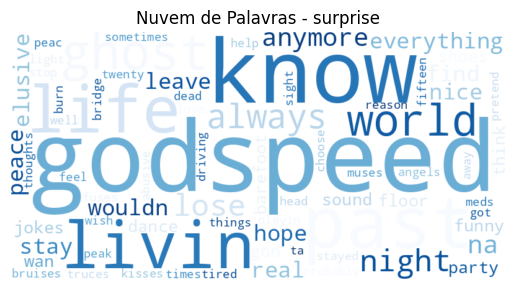

Nenhuma letra encontrada para a emoção 'disgust'.


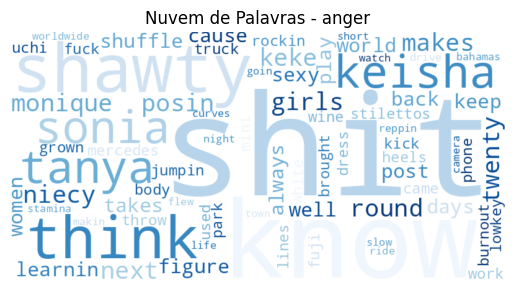

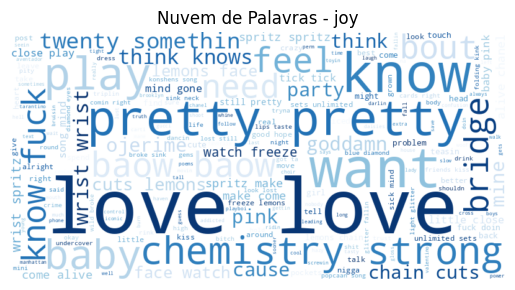

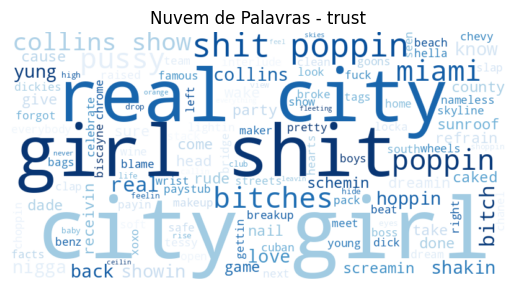

Nenhuma letra encontrada para a emoção 'sadness'.


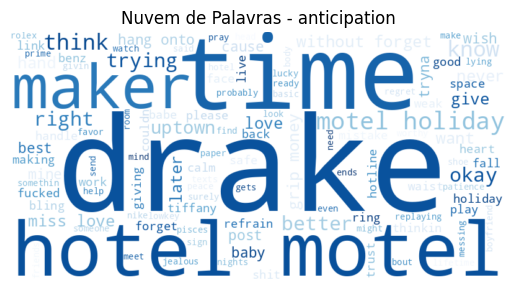

In [66]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_xo[df_xo['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

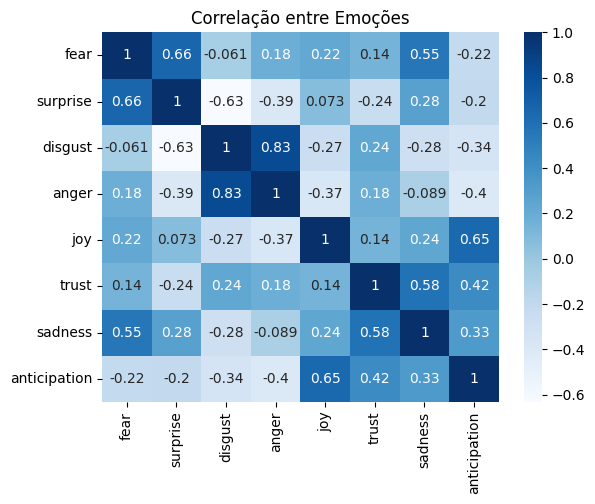

In [67]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_xo['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()